In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
train = pd.read_csv('TRAIN.csv')
train.head()

,idx,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1480107904,11/25/2016 12:00:00 AM,11:05:04,288.44,46,30.48,101,129.84,13.50,06:37:00,17:42:00
1,1,1472818508,9/2/2016 12:00:00 AM,02:15:08,2.79,50,30.42,75,173.90,6.75,06:07:00,18:37:00
2,2,1475804719,10/6/2016 12:00:00 AM,15:45:19,118.05,54,30.42,100,7.35,1.12,06:15:00,18:07:00
3,3,1482533149,12/23/2016 12:00:00 AM,12:45:49,853.17,58,30.44,57,81.67,11.25,06:54:00,17:50:00
4,4,1481883019,12/16/2016 12:00:00 AM,00:10:19,1.24,42,30.24,103,171.13,2.25,06:50:00,17:46:00


In [71]:
train.shape

(26149, 12)

In [72]:
train.describe()

,idx,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,26149.000000,2.614900e+04,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000
mean,13074.000000,1.478046e+09,208.621000,51.135110,30.423005,74.970936,143.368247,6.262052
std,7548.710431,3.004309e+06,316.089736,6.212018,0.054679,26.008728,83.424186,3.503488
min,0.000000,1.472724e+09,1.110000,35.000000,30.190000,8.000000,0.090000,0.000000
25%,6537.000000,1.475544e+09,1.230000,46.000000,30.400000,56.000000,81.580000,3.370000
50%,13074.000000,1.478029e+09,2.720000,50.000000,30.430000,85.000000,147.320000,5.620000
75%,19611.000000,1.480473e+09,360.260000,55.000000,30.460000,97.000000,179.240000,7.870000
max,26148.000000,1.483264e+09,1601.260000,71.000000,30.560000,103.000000,359.940000,40.500000


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26149 entries, 0 to 26148
Data columns (total 12 columns):
idx                       26149 non-null int64
UNIXTime                  26149 non-null int64
Data                      26149 non-null object
Time                      26149 non-null object
Radiation                 26149 non-null float64
Temperature               26149 non-null int64
Pressure                  26149 non-null float64
Humidity                  26149 non-null int64
WindDirection(Degrees)    26149 non-null float64
Speed                     26149 non-null float64
TimeSunRise               26149 non-null object
TimeSunSet                26149 non-null object
dtypes: float64(4), int64(4), object(4)
memory usage: 2.4+ MB


In [74]:
train.duplicated().sum()

0

In [75]:
test = pd.read_csv('TEST.csv')
test.head()

,idx,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1482775250,12/26/2016 12:00:00 AM,08:00:50,48,30.47,101,187.78,4.50,06:55:00,17:51:00
1,1,1482774940,12/26/2016 12:00:00 AM,07:55:40,48,30.47,101,133.40,10.12,06:55:00,17:51:00
2,2,1482774649,12/26/2016 12:00:00 AM,07:50:49,48,30.47,101,160.69,5.62,06:55:00,17:51:00
3,3,1482774351,12/26/2016 12:00:00 AM,07:45:51,48,30.47,101,144.56,7.87,06:55:00,17:51:00
4,4,1482774039,12/26/2016 12:00:00 AM,07:40:39,48,30.47,101,169.05,10.12,06:55:00,17:51:00


In [76]:
test.shape

(6537, 11)

In [77]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6537 entries, 0 to 6536
Data columns (total 11 columns):
idx                       6537 non-null int64
UNIXTime                  6537 non-null int64
Data                      6537 non-null object
Time                      6537 non-null object
Temperature               6537 non-null int64
Pressure                  6537 non-null float64
Humidity                  6537 non-null int64
WindDirection(Degrees)    6537 non-null float64
Speed                     6537 non-null float64
TimeSunRise               6537 non-null object
TimeSunSet                6537 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 561.9+ KB


In [78]:
train['DataMonth'] = train['Data'].apply(lambda x:x.split('/')[0])
train['DataDate'] = train['Data'].apply(lambda x:x.split('/')[1])
train['DataYear'] = train['Data'].apply(lambda x:x.split('/')[2])
train['DataYear'] = train['DataYear'].apply(lambda x:x.split(' ')[0])

In [79]:
test['DataMonth'] = test['Data'].apply(lambda x:x.split('/')[0])
test['DataDate'] = test['Data'].apply(lambda x:x.split('/')[1])
test['DataYear'] = test['Data'].apply(lambda x:x.split('/')[2])
test['DataYear'] = test['DataYear'].apply(lambda x:x.split(' ')[0])

In [80]:
l = ['DataMonth', 'DataDate', 'DataYear']
for i in l:
    train[i] = train[i].astype(int)

In [81]:
l = ['DataMonth', 'DataDate', 'DataYear']
for i in l:
    test[i] = test[i].astype(int)

In [82]:
train['HourTimeSunRise'] = train['TimeSunRise'].apply(lambda x:x.split(':')[0])
test['HourTimeSunRise'] = test['TimeSunRise'].apply(lambda x:x.split(':')[0])

In [83]:
train['MinuteTimeSunRise'] = train['TimeSunRise'].apply(lambda x:x.split(':')[1])
test['MinuteTimeSunRise'] = test['TimeSunRise'].apply(lambda x:x.split(':')[1])

In [84]:
train['HourTimeSunSet'] = train['TimeSunSet'].apply(lambda x:x.split(':')[0])
test['HourTimeSunSet'] = test['TimeSunSet'].apply(lambda x:x.split(':')[0])

In [85]:
train['MinuteTimeSunSet'] = train['TimeSunSet'].apply(lambda x:x.split(':')[1])
test['MinuteTimeSunSet'] = test['TimeSunSet'].apply(lambda x:x.split(':')[1])

In [86]:
train['TotalTimeHour'] = train['Time'].apply(lambda x:x.split(':')[0])
train['TotalTimeMinute'] = train['Time'].apply(lambda x:x.split(':')[1])
train['TotalTimeSecond'] = train['Time'].apply(lambda x:x.split(':')[2])

In [87]:
test['TotalTimeHour'] = test['Time'].apply(lambda x:x.split(':')[0])
test['TotalTimeMinute'] = test['Time'].apply(lambda x:x.split(':')[1])
test['TotalTimeSecond'] = test['Time'].apply(lambda x:x.split(':')[2])

In [88]:
l = ['HourTimeSunRise', 'MinuteTimeSunRise', 'HourTimeSunSet', 'MinuteTimeSunSet', 'TotalTimeHour', 'TotalTimeMinute', 'TotalTimeSecond']
for i in l:
    train[i] = train[i].astype(int)

In [89]:
l = ['HourTimeSunRise', 'MinuteTimeSunRise', 'HourTimeSunSet', 'MinuteTimeSunSet', 'TotalTimeHour', 'TotalTimeMinute', 'TotalTimeSecond']
for i in l:
    test[i] = test[i].astype(int)

In [90]:
train = train.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis = 1)
test = test.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet'], axis = 1)

In [91]:
train = train.drop('idx', axis = 1)
newtest = test
newtest = newtest.drop('idx', axis = 1)

In [92]:
train.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DataMonth,DataDate,DataYear,HourTimeSunRise,MinuteTimeSunRise,HourTimeSunSet,MinuteTimeSunSet,TotalTimeHour,TotalTimeMinute,TotalTimeSecond
0,1480107904,288.44,46,30.48,101,129.84,13.50,11,25,2016,6,37,17,42,11,5,4
1,1472818508,2.79,50,30.42,75,173.90,6.75,9,2,2016,6,7,18,37,2,15,8
2,1475804719,118.05,54,30.42,100,7.35,1.12,10,6,2016,6,15,18,7,15,45,19
3,1482533149,853.17,58,30.44,57,81.67,11.25,12,23,2016,6,54,17,50,12,45,49
4,1481883019,1.24,42,30.24,103,171.13,2.25,12,16,2016,6,50,17,46,0,10,19


In [93]:
newtest.head()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DataMonth,DataDate,DataYear,HourTimeSunRise,MinuteTimeSunRise,HourTimeSunSet,MinuteTimeSunSet,TotalTimeHour,TotalTimeMinute,TotalTimeSecond
0,1482775250,48,30.47,101,187.78,4.50,12,26,2016,6,55,17,51,8,0,50
1,1482774940,48,30.47,101,133.40,10.12,12,26,2016,6,55,17,51,7,55,40
2,1482774649,48,30.47,101,160.69,5.62,12,26,2016,6,55,17,51,7,50,49
3,1482774351,48,30.47,101,144.56,7.87,12,26,2016,6,55,17,51,7,45,51
4,1482774039,48,30.47,101,169.05,10.12,12,26,2016,6,55,17,51,7,40,39


In [94]:
train.shape

(26149, 17)

In [95]:
newtest.shape

(6537, 16)

In [96]:
x = train.drop('Radiation', axis = 1)
y = train['Radiation']

In [97]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)

In [99]:
from sklearn.metrics import mean_squared_error

In [100]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

76.13926351703407


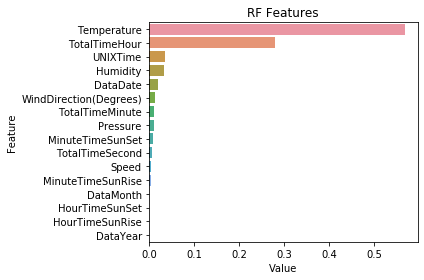

In [101]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, x.columns), reverse=True)[:50], columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RF Features')
plt.tight_layout()
plt.show()

In [118]:
x_train = train.drop(['HourTimeSunSet', 'HourTimeSunRise', 'Radiation', 'DataMonth', 'DataYear', 'MinuteTimeSunRise', 'Speed', 'TotalTimeSecond', 'MinuteTimeSunSet'], axis = 1)
y_train = train['Radiation']
x_test = newtest.drop(['HourTimeSunSet', 'HourTimeSunRise', 'DataMonth', 'DataYear', 'MinuteTimeSunRise', 'Speed', 'TotalTimeSecond', 'MinuteTimeSunSet'], axis = 1)

In [119]:
rf = RandomForestRegressor()
y_pred = rf.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'idx': test.idx, 'Radiation' : y_pred})
solution.to_csv('Solution1.csv', index = False)